# <div style='width:fit-content;background:linear-gradient(90deg,#cb42f5,#0388fc);background-clip: text;color: transparent;'>Testing The Model By Anass Dabaghi<br></div>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

### <div style='width:fit-content;color: #1a1a1a;'>Loading The Model<br>
</div>

In [2]:

print("loading model...")
model = load_model('gender_classification_model_v4.h5')
class_labels = ["Man", "Woman"]
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150

print("Model Loaded Succefully")


loading model...


Model Loaded Succefully


In [3]:


def preprocess_image(img_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array
    
def predict_and_show(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    print(prediction[0][0])
    predicted_class = class_labels[int(prediction[0][0] > 0.5)]
    print(f"Predicted class: {predicted_class}")



### <div style='width:fit-content;color: #1a1a1a;'>Evaluation On Test Set<br>
</div>

In [11]:
test_dataset_path = 'model_test_images'

test_dataset = tf.keras.utils.image_dataset_from_directory(
  test_dataset_path,
  labels='inferred',
  label_mode='binary',
  batch_size=5,
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  shuffle=False
)
normalization_layer = tf.keras.layers.Rescaling(1./255)
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

model_loss, model_accuracy = model.evaluate(test_dataset)

print(f"Test Loss: {model_loss:.2f}")
print(f"Test Accuracy: {model_accuracy * 100:.2f}%")

Found 27 files belonging to 2 classes.


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 457ms/step - accuracy: 0.9894 - loss: 0.8723
Test Loss: 0.96
Test Accuracy: 96.30%


### <div style='width:fit-content;color: #1a1a1a;'>Predictions<br>
<div style="color:#696969;">let's predict test set and plot it.</div></div>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

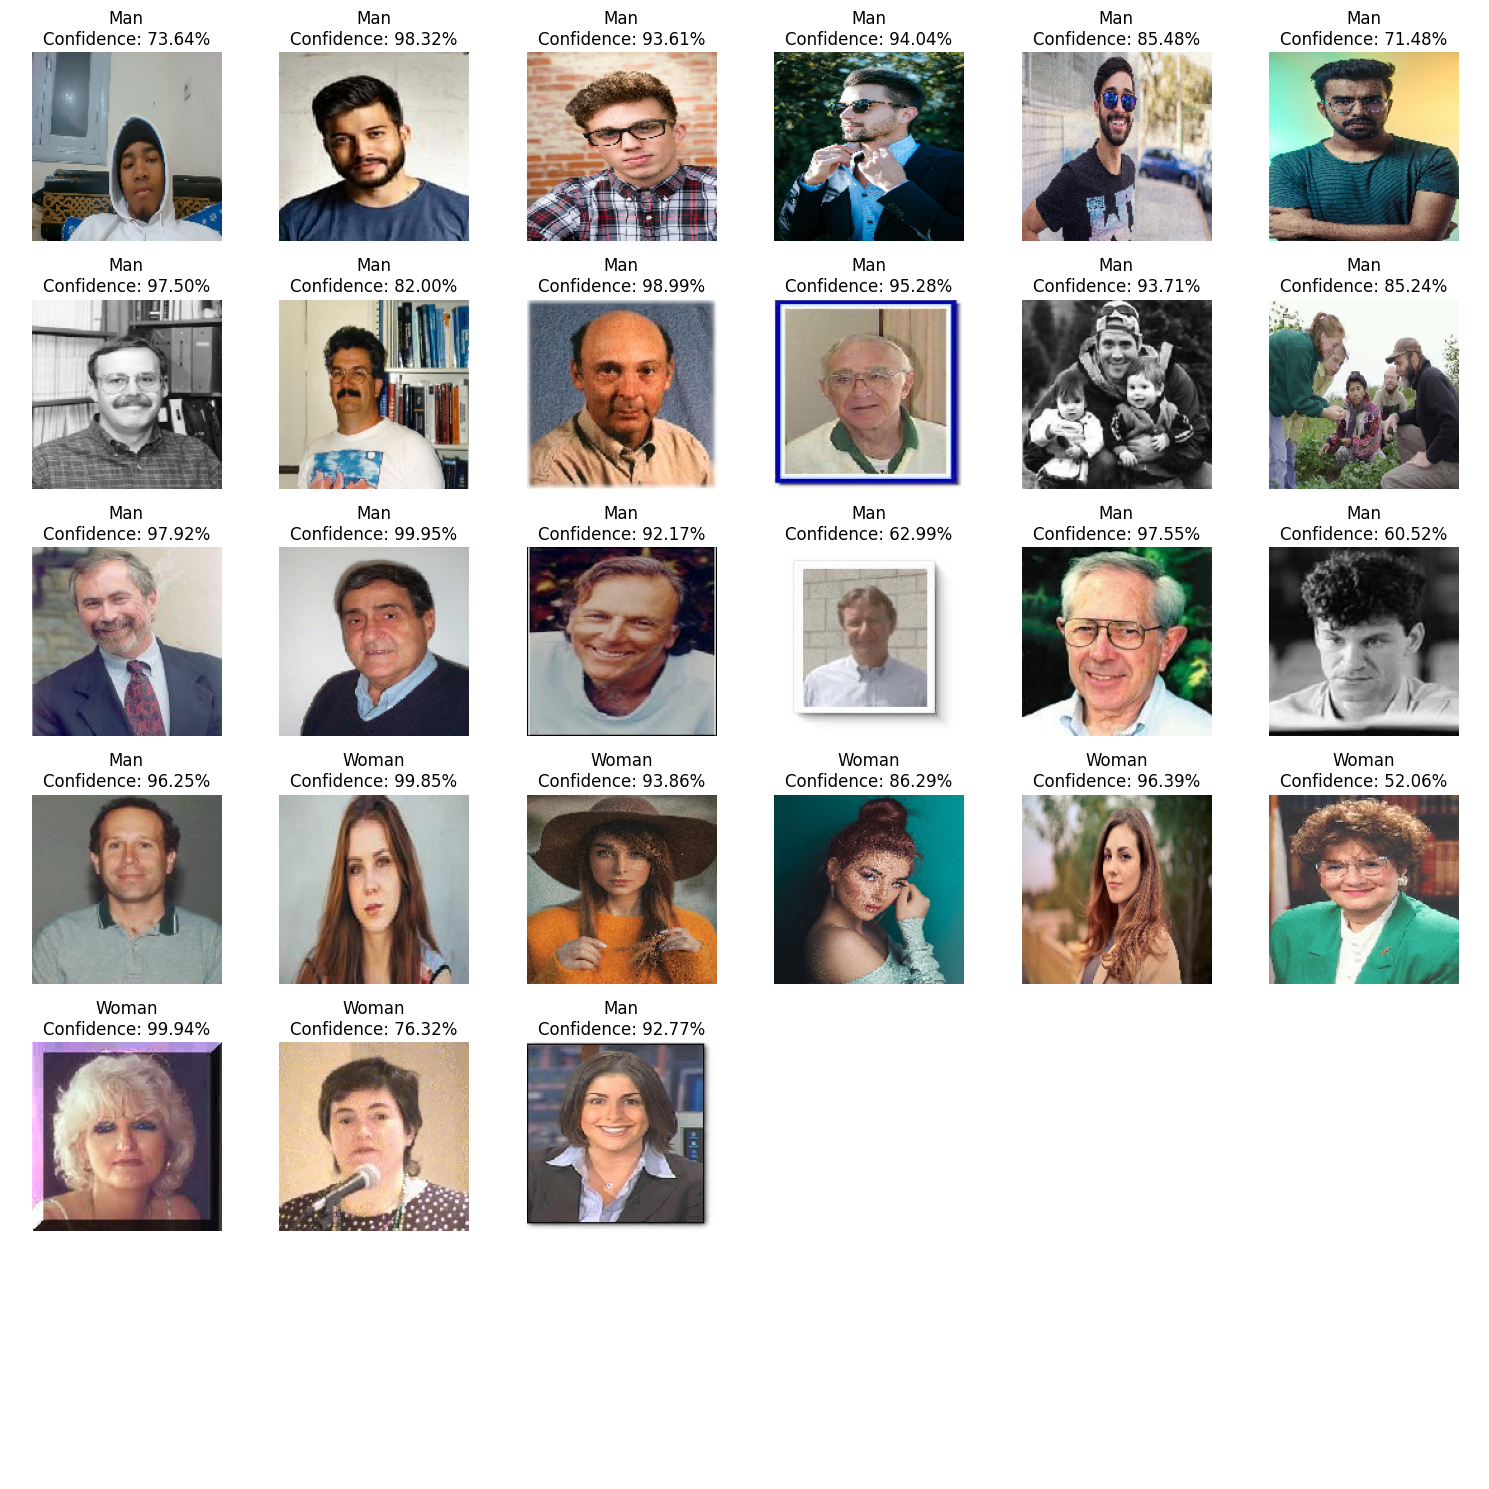

In [8]:
import os
import matplotlib.pyplot as plt

test_folder = 'model_test_images'
subfolders = ['man', 'woman']
image_paths = []

for subfolder in subfolders:
  folder_path = os.path.join(test_folder, subfolder)
  image_paths.extend([os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.jpg') or filename.endswith('.png')])

num_images = len(image_paths)
grid_size = int(num_images**0.5) + 1

fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
axes = axes.flatten()

for ax, img_path in zip(axes, image_paths):
  img = image.load_img(img_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
  img_array = preprocess_image(img_path)
  prediction = model.predict(img_array)
  predicted_class = class_labels[int(prediction[0][0] > 0.5)]
  
  ax.imshow(img, cmap='gray')
  ax.axis('off')
  confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]
  ax.set_title(f"{predicted_class}\nConfidence: {confidence * 100:.2f}%")

for ax in axes[num_images:]:
  ax.axis('off')

plt.tight_layout()
plt.show()

### <div style='width:fit-content;color: #1a1a1a;'>Testing With Your Camera<br>
<div style="color:#696969;">run this block and smile 😊.</div></div>

In [ ]:
import cv2

def capture_image_from_camera():
  cap = cv2.VideoCapture(0)
  if not cap.isOpened():
    print("Error: Could not open webcam")
    return None
  
  ret, frame = cap.read()
  if not ret:
    print("Error: Could not read frame")
    return None
  
  img_path = 'captured_image.jpg'
  cv2.imwrite(img_path, frame)
  cap.release()
  cv2.destroyAllWindows()
  return img_path

captured_img_path = capture_image_from_camera()
if captured_img_path:
  predict_and_show(captured_img_path)
  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
0.19831459
Predicted class: Man
